In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28, 1)

In [3]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
#dodanie szumu do obrazu
noise_factor = 0.2
x_train_noisy = x_train + noise_factor*tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor*tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy,clip_value_min=0,clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy,clip_value_min=0,clip_value_max=1.)

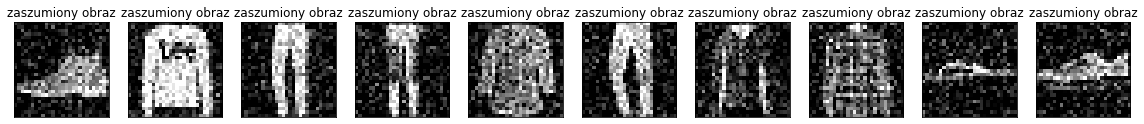

In [7]:
#wyświetlenie zaszumionych obrazów
n = 10
plt.figure(figsize=(20,2))
for i in range(n):
    ax = plt.subplot(1,n,i+1)
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.title("zaszumiony obraz")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [8]:
#splotowy endcoder odszumiający
class Denoise(Model):
    def __init__(self):
        super(Denoise,self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28,28,1)),
            layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=2),
            layers.Conv2D(8,(3,3),activation='relu',padding='same',strides=2)
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8,kernel_size=3,activation='relu',padding='same',strides=2),
            layers.Conv2DTranspose(16,kernel_size=3,activation='relu',padding='same',strides=2),
            layers.Conv2D(1,kernel_size=(3,3),activation='sigmoid',padding='same')
        ])
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    

In [9]:
autoencoder= Denoise()

In [10]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy,x_train,epochs=10,shuffle=True,validation_data=(x_test_noisy,x_test))

Epoch 1/10
 889/1875 [=============>................] - ETA: 41s - loss: 0.0255